# 1. In 250-500 words, write a thorough discussion of when to use ML and when not to. Do NOT go over the 500-word limit. It is essential to express this concisely. This should be informed by the Machine Learning for Business DataCamp course.

Machine learning can be used by businesses when they need complex models to draw causal insights(e.g understand why customers are churning, why product is not selling well,etc.), better predict future events(e.g. which customers are expected to churn in the next month, which mortgage clients are likely to default on their loans),and understand patterns in data (how customers can be segmented into groups based on similar purchases or service consumption). Machine learning can only be used when data is reliably available,normalized, organized, and cleansed for Machine Learning processing-once above is achieved Machine Learning can be initiated in discovery and experimentation(e.g.prototype models) mode to gain some insights on what features of the data are actionable and how. Only then business can start deploying the resulting models in production for continuous utilization.
Machine learning should not be used when business does not fully understand their data yet(instead traditional data analysis and aggregation techniques can be used to identify trends, distributions, etc.) or when simpler and more precise solutions are available (e.g. addressing common issues with known and documented solutions).Machine Learning should not be used when data is not being captured fully or correctly,stored reliably and being organized and cleansed for Machine Learning since it will result in "garbage in -> garbage out" situation. Machine Learning should not be used when the company does not have access to appropriate subject matter experts such as data scientists and Machine Learning engineers who are capable of defining and testing different models and deploying them into production systems. 

# 2. Perform pre-processing on the Lending Club dataset from class. Clearly use markdown to indicate each pre-processing step you are using. Note: you should use at least three different techniques.

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import seaborn as sns

df = pd.read_csv("loans_full_schema.csv")
df


,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


First thing I did is to visually review the dataset in a table form. it is useful to be able to generate a list of the features present in your dataset.also useful to look at (dtypes) data. 
Data Preprocessing can be broken down into 4 different stages: Data cleaning, data integration, data transformation, and data reduction are the four categories.

I used Df.info() because we can see here nearly all information about data. how many rows and columns there. Columns names and how many columns not null.As you can see there is 10000 rows and total 55 columns. 

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

using this (df.info()) information, I decided to remove 7,8,9,11,20 columns because majority of their values are Nulls. I used dropna() method for that. 

In [61]:
df.drop(columns = ["annual_income_joint","verification_income_joint","debt_to_income_joint","months_since_90d_late"], inplace = True)
df.shape

(10000, 51)

There were still NAN values left in some of the rows -I will be removing them next.

In [62]:
df.dropna(inplace = True) # remove NAN values in the rows
df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0,38.0,2001,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,0,28.0,2006,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
8,parts,10.0,NV,MORTGAGE,65000.0,Source Verified,36.48,1,18.0,1998,...,C2,Feb-2018,Current,whole,Cash,18156.66,2703.22,1843.34,859.88,0.0
10,supervisor,10.0,IL,MORTGAGE,75000.0,Verified,10.45,0,50.0,1996,...,C4,Mar-2018,Current,whole,Cash,24143.51,1764.95,856.49,908.46,0.0
12,respiratory therapist & sleep lab tech,5.0,SC,MORTGAGE,122000.0,Source Verified,12.06,0,37.0,1990,...,C2,Feb-2018,Current,whole,Cash,14525.30,2204.88,1474.70,730.18,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,inspector/packer,10.0,AZ,RENT,65000.0,Verified,27.10,0,29.0,1982,...,C4,Jan-2018,Current,fractional,Cash,9421.91,1174.13,578.09,596.04,0.0
9990,medical director,4.0,NJ,OWN,96774.0,Source Verified,0.04,2,12.0,2000,...,B1,Feb-2018,Current,fractional,Cash,7386.91,12975.62,12613.09,362.53,0.0
9994,da coordinator,1.0,WA,RENT,40000.0,Not Verified,12.07,0,62.0,2008,...,B3,Mar-2018,Current,fractional,Cash,1854.81,3064.65,2945.19,119.46,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,4,9.0,1994,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0


Next I will be checking for duplicates: If the same row or column is repeated, only its first instance should be kept. This is done to avoid providing bias towards duplicate values when running machine learning algorithms. There are no duplicate rows or columns. 

In [63]:
df.duplicated().sum()

0

Since Machine learning does not accept categorical values, I will use get_dummies method to convert the categorical data to numeric to prepare the data to machine learning. 

In [6]:
dummies = pd.get_dummies(df.emp_title)
dummies 

,combo psc/hub,coordinator,director of engineering,freight worker,lead hydraulic mechanic,machine operator,quality control technician,1st grade teacher,21 dealer,360app specialist,...,wire technician,work comp specialist,workflow consultant,workforce analyst,writer producer scripps interactive,yard driver,yard specialist,youth specialist,youth supervisor,zone manager
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Next I will add converted columns to data. 

In [64]:
merged = pd.concat([df,dummies],axis = "columns")
merged

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,...,wire technician,work comp specialist,workflow consultant,workforce analyst,writer producer scripps interactive,yard driver,yard specialist,youth specialist,youth supervisor,zone manager
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0,38.0,2001,...,0,0,0,0,0,0,0,0,0,0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,0,28.0,2006,...,0,0,0,0,0,0,0,0,0,0
8,parts,10.0,NV,MORTGAGE,65000.0,Source Verified,36.48,1,18.0,1998,...,0,0,0,0,0,0,0,0,0,0
10,supervisor,10.0,IL,MORTGAGE,75000.0,Verified,10.45,0,50.0,1996,...,0,0,0,0,0,0,0,0,0,0
12,respiratory therapist & sleep lab tech,5.0,SC,MORTGAGE,122000.0,Source Verified,12.06,0,37.0,1990,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,inspector/packer,10.0,AZ,RENT,65000.0,Verified,27.10,0,29.0,1982,...,0,0,0,0,0,0,0,0,0,0
9990,medical director,4.0,NJ,OWN,96774.0,Source Verified,0.04,2,12.0,2000,...,0,0,0,0,0,0,0,0,0,0
9994,da coordinator,1.0,WA,RENT,40000.0,Not Verified,12.07,0,62.0,2008,...,0,0,0,0,0,0,0,0,0,0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,4,9.0,1994,...,0,0,0,0,0,0,0,0,0,0


Now I will drop the legacy categorical column.

In [65]:
final = merged.drop(["emp_title","zone manager"],axis = "columns")
final


,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,...,wic manager,wire technician,work comp specialist,workflow consultant,workforce analyst,writer producer scripps interactive,yard driver,yard specialist,youth specialist,youth supervisor
0,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0,38.0,2001,6,...,0,0,0,0,0,0,0,0,0,0
2,3.0,WI,RENT,40000.0,Source Verified,21.15,0,28.0,2006,4,...,0,0,0,0,0,0,0,0,0,0
8,10.0,NV,MORTGAGE,65000.0,Source Verified,36.48,1,18.0,1998,3,...,0,0,0,0,0,0,0,0,0,0
10,10.0,IL,MORTGAGE,75000.0,Verified,10.45,0,50.0,1996,4,...,0,0,0,0,0,0,0,0,0,0
12,5.0,SC,MORTGAGE,122000.0,Source Verified,12.06,0,37.0,1990,8,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,10.0,AZ,RENT,65000.0,Verified,27.10,0,29.0,1982,1,...,0,0,0,0,0,0,0,0,0,0
9990,4.0,NJ,OWN,96774.0,Source Verified,0.04,2,12.0,2000,4,...,0,0,0,0,0,0,0,0,0,0
9994,1.0,WA,RENT,40000.0,Not Verified,12.07,0,62.0,2008,0,...,0,0,0,0,0,0,0,0,0,0
9996,8.0,PA,MORTGAGE,121000.0,Verified,32.38,4,9.0,1994,1,...,0,0,0,0,0,0,0,0,0,0


# 3. Create a correlation matrix with a heatmap for the features in the Lending Club dataset. Use markdown to write about your takeaways in under 250 words.

Correlation heatmap is graphical representation of correlation matrix representing correlation between different variables. Here is a sample correlation heatmap created to understand the linear relationship between different variables in the housing data set. The code is discussed in the later section.
there are multiple variables and the goal is to find correlation between all of these variables and store them using appropriate data structure, the matrix data structure is used. Such matrix is called as correlation matrix. 
If the value is 1, it is said to be positive correlation between two variables. This means that when one variable increases, the other variable also increases.
If the value is -1, it is said to be negative correlation between two variables. This means that when one variable increases, the other variable decreases.
If the value is 0, there is no correlation between two variables. This means that the variables changes in a random manner with respect to each other. As you can see on plot long horezontal has number 1 it means emp_lenght correlated between it self.Annual_income less correlated with emp_lengt. 

<AxesSubplot:>

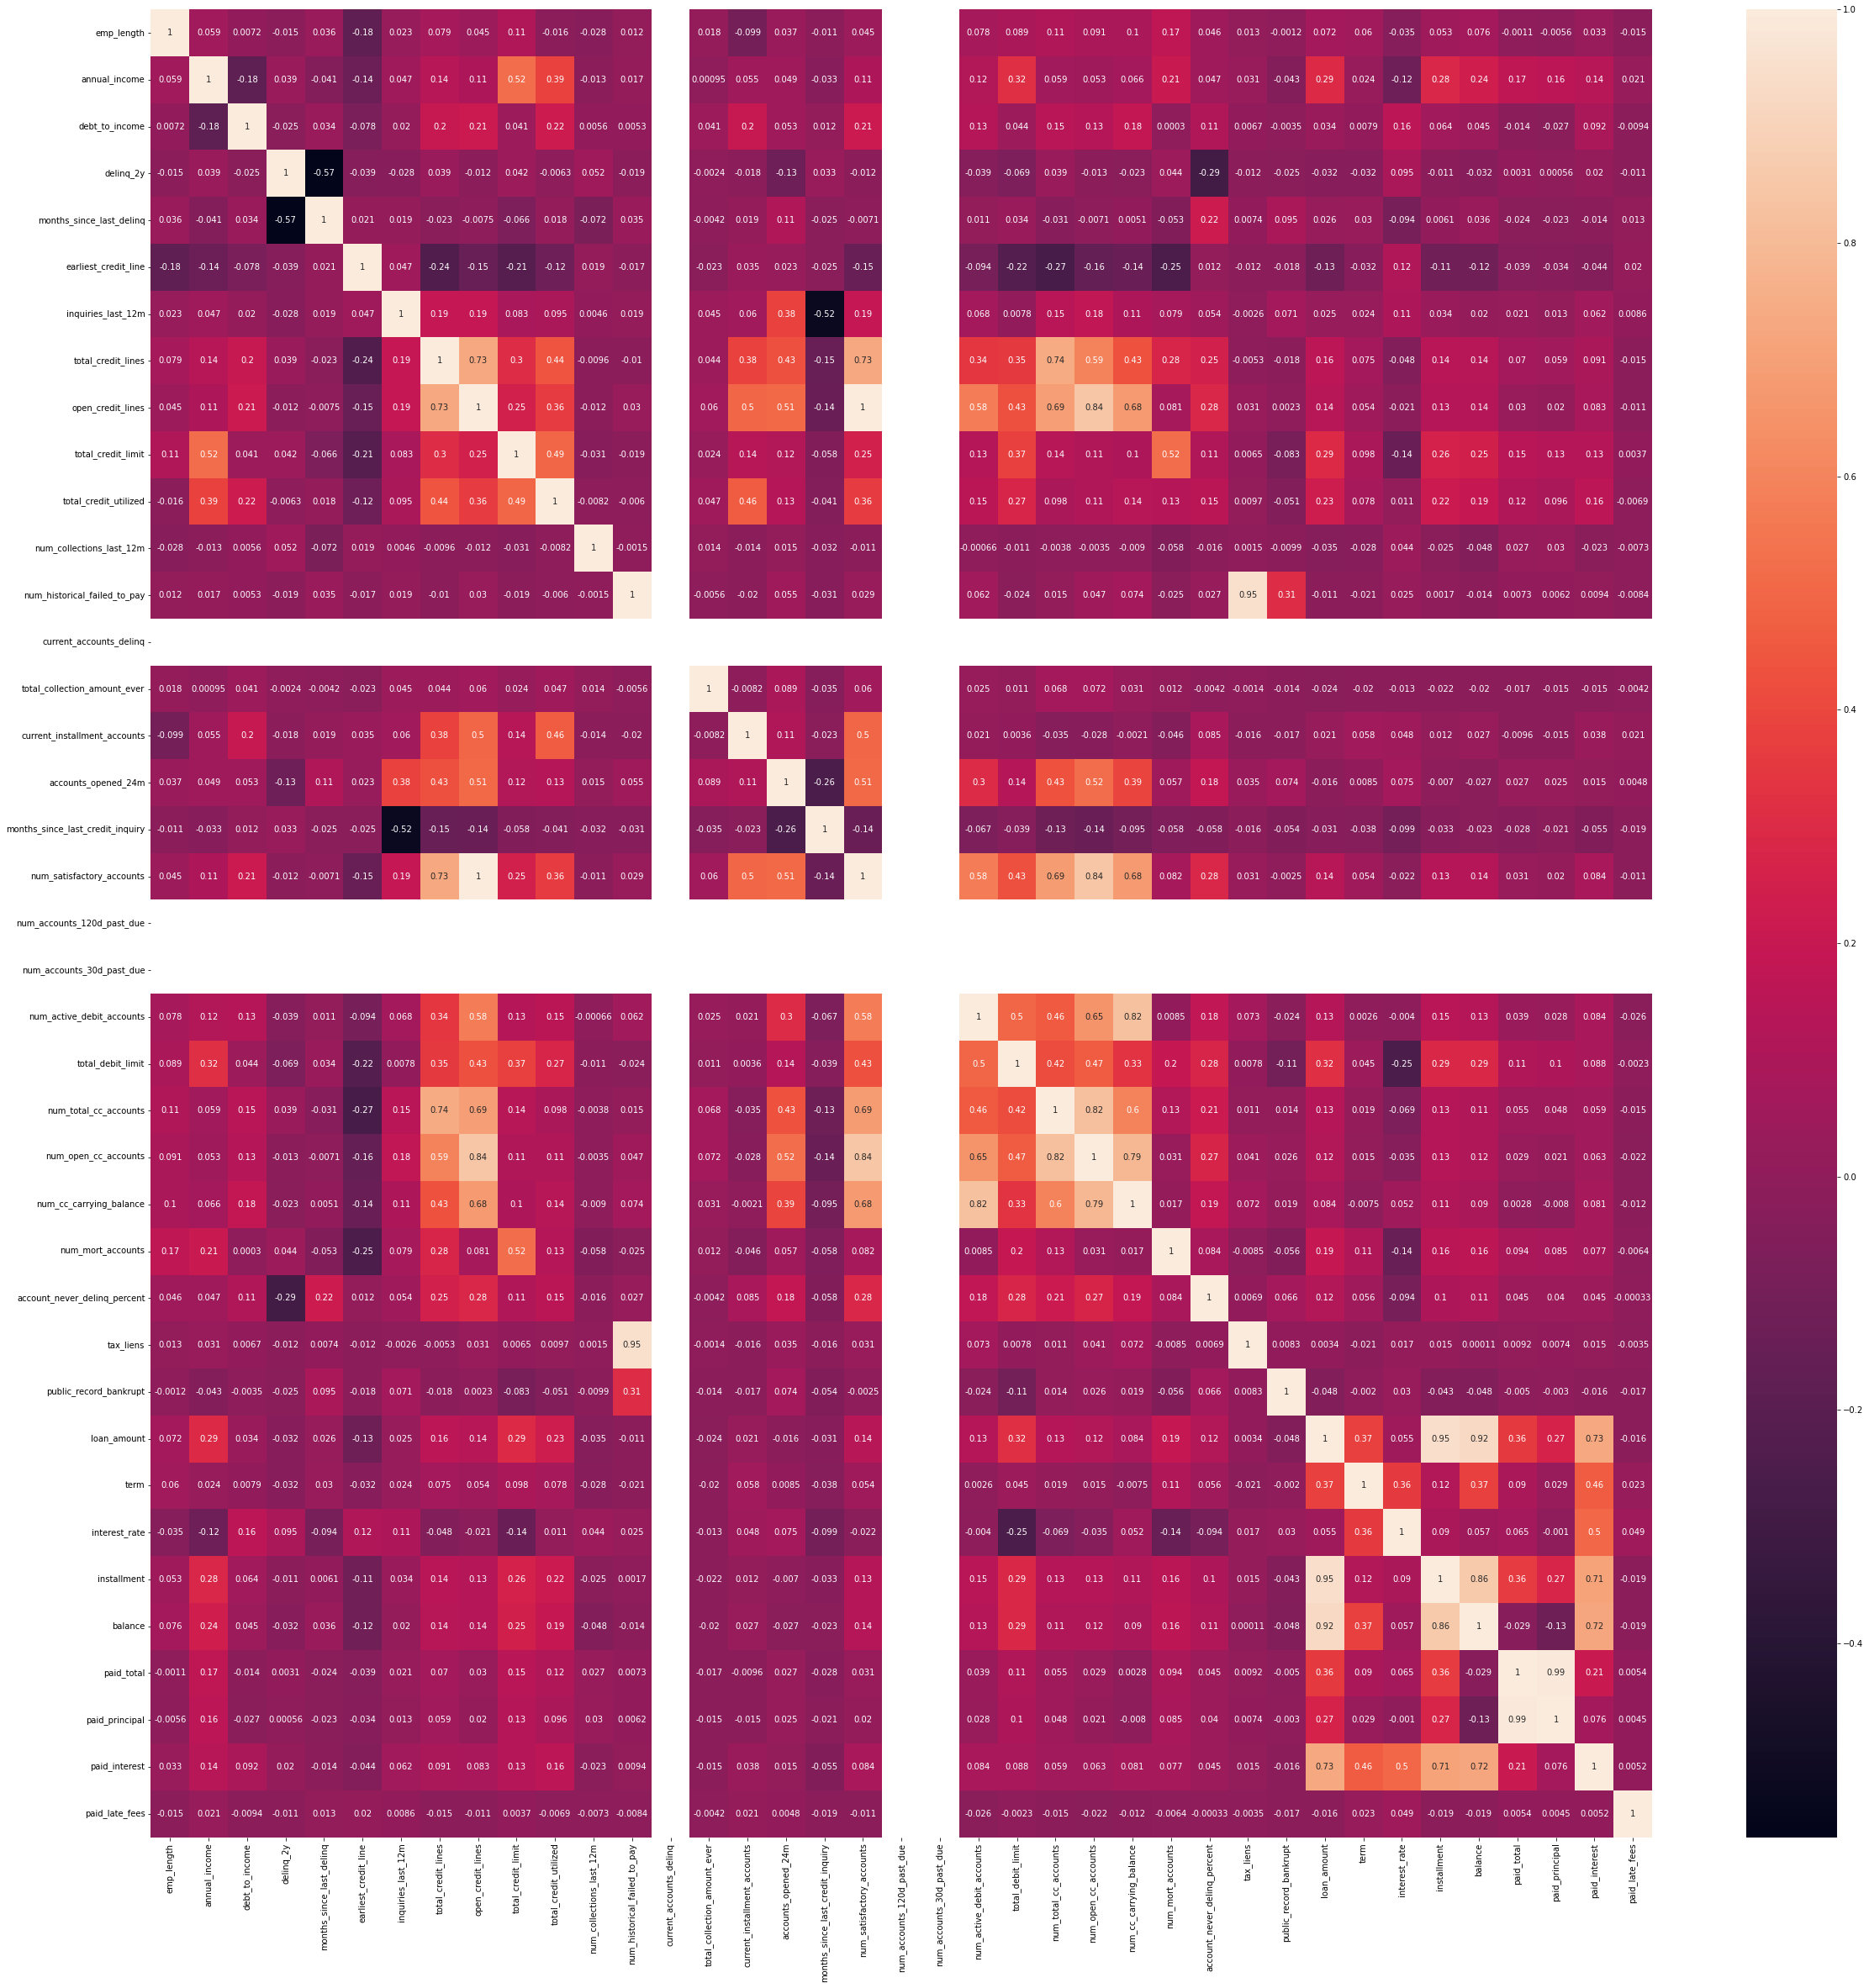

In [67]:

corrMatrix = df.corr()
plt.figure(figsize = (40,40))
sns.heatmap(corrMatrix,annot=True)


# 4. Create a histogram showing the frequency of loan_amounts. Describe what you see. Pay special attention to bin sizes, and clearly describe how you chose your bin sizes.

I chose 8 bins so that bin boundaries would be placed closer to whole thousands.
In the plot, I see that loans with the values of 5K-10K are the most popular followed by 10K-15K and 15K-20K loans. Loans with values higher than 20K happen more rarely as opposed to loans with values of less than 20K. There are no loans with values higher than 40K.  are more than 40,000. I mean people take more average amount loan then high and small amount loan.

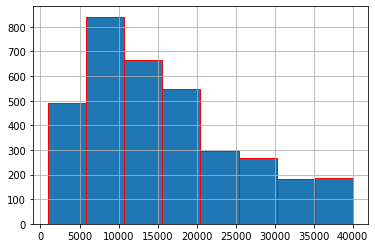

In [68]:
hist_plot = df["loan_amount"].hist(edgecolor="red",bins =8 )
plt.show()

# 5. Create a new column called region that uses a lambda and shows which part of the US someone lives in, split up into Pacific, Plains, Midwest, Northeast, and South. Consider having your lambda call a function.

a. Is there a better way to do this than with a lambda?



In [69]:
def region_lambda(row):
    
        Pacific = ['AK','CA','HI','OR','WA']
        Plains = ['MT','WY','CO','NE','KS','OK','NM','TX','PD','ND']
        Midwest = ['IL','IN','IA','KS','MI','MN','MO','OH','WI']
        Northeast = ['NY','NJ','VT','MA','ME','CT','NH','PA','RI']
        South = ['FL','GA','MD','NC','SC','VA','WV','DE','AL','KY','MS','TN','AR','LA','OK','TX']

        if row['state'] in Pacific:
            return 'Pacific'
        elif row['state'] in  Plains:
            return 'Plains'
        elif row['state'] in Midwest:
            return 'Midwest'
        elif row['state'] in Northeast:
            return 'Northeast'
        elif row['state'] in South:
            return 'South'
df_r = df.copy()

df_r["Region"]=""

df_r["Region"]=df_r.apply(lambda row: region_lambda(row), axis =1)
df_r

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,...,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,Region
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0,38.0,2001,...,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,Northeast
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,0,28.0,2006,...,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,Midwest
8,parts,10.0,NV,MORTGAGE,65000.0,Source Verified,36.48,1,18.0,1998,...,Feb-2018,Current,whole,Cash,18156.66,2703.22,1843.34,859.88,0.0,None
10,supervisor,10.0,IL,MORTGAGE,75000.0,Verified,10.45,0,50.0,1996,...,Mar-2018,Current,whole,Cash,24143.51,1764.95,856.49,908.46,0.0,Midwest
12,respiratory therapist & sleep lab tech,5.0,SC,MORTGAGE,122000.0,Source Verified,12.06,0,37.0,1990,...,Feb-2018,Current,whole,Cash,14525.30,2204.88,1474.70,730.18,0.0,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,inspector/packer,10.0,AZ,RENT,65000.0,Verified,27.10,0,29.0,1982,...,Jan-2018,Current,fractional,Cash,9421.91,1174.13,578.09,596.04,0.0,None
9990,medical director,4.0,NJ,OWN,96774.0,Source Verified,0.04,2,12.0,2000,...,Feb-2018,Current,fractional,Cash,7386.91,12975.62,12613.09,362.53,0.0,Northeast
9994,da coordinator,1.0,WA,RENT,40000.0,Not Verified,12.07,0,62.0,2008,...,Mar-2018,Current,fractional,Cash,1854.81,3064.65,2945.19,119.46,0.0,Pacific
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,4,9.0,1994,...,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0,Northeast


b. Either use two different lambdas or a lambda and a different technique and see which one is more performant. Explain your findings in the markdown

In [87]:
df_region = df.copy() # copy dataframe and put new name.

Pacific = ['AK','CA','HI','OR','WA']
Plains = ['MT','WY','CO','NE','KS','OK','NM','TX','PD','ND']
Midwest = ['IL','IN','IA','KS','MI','MN','MO','OH','WI']
Northeast = ['NY','NJ','VT','MA','ME','CT','NH','PA','RI']
South = ['FL','GA','MD','NC','SC','VA','WV','DE','AL','KY','MS','TN','AR','LA','OK','TX'] # list of all states.

Region = [] # new empty list
for value in df_region['state']:
    if value in Pacific:
        Region.append("Pacific")
    elif value in (Plains):
        Region.append("Plains")
    elif value in (Midwest):
        Region.append("Midwest")
    elif value in (Northeast):
        Region.append("Northeast")
    else:
        Region.append("South")

df_region["Region"] = Region
        

df_region



,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,...,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,Region
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0,38.0,2001,...,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,Northeast
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,0,28.0,2006,...,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,Midwest
8,parts,10.0,NV,MORTGAGE,65000.0,Source Verified,36.48,1,18.0,1998,...,Feb-2018,Current,whole,Cash,18156.66,2703.22,1843.34,859.88,0.0,South
10,supervisor,10.0,IL,MORTGAGE,75000.0,Verified,10.45,0,50.0,1996,...,Mar-2018,Current,whole,Cash,24143.51,1764.95,856.49,908.46,0.0,Midwest
12,respiratory therapist & sleep lab tech,5.0,SC,MORTGAGE,122000.0,Source Verified,12.06,0,37.0,1990,...,Feb-2018,Current,whole,Cash,14525.30,2204.88,1474.70,730.18,0.0,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,inspector/packer,10.0,AZ,RENT,65000.0,Verified,27.10,0,29.0,1982,...,Jan-2018,Current,fractional,Cash,9421.91,1174.13,578.09,596.04,0.0,South
9990,medical director,4.0,NJ,OWN,96774.0,Source Verified,0.04,2,12.0,2000,...,Feb-2018,Current,fractional,Cash,7386.91,12975.62,12613.09,362.53,0.0,Northeast
9994,da coordinator,1.0,WA,RENT,40000.0,Not Verified,12.07,0,62.0,2008,...,Mar-2018,Current,fractional,Cash,1854.81,3064.65,2945.19,119.46,0.0,Pacific
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,4,9.0,1994,...,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0,Northeast


# 6. Create subplot histograms to show if loan_amounts differ by region. Summarize your findings

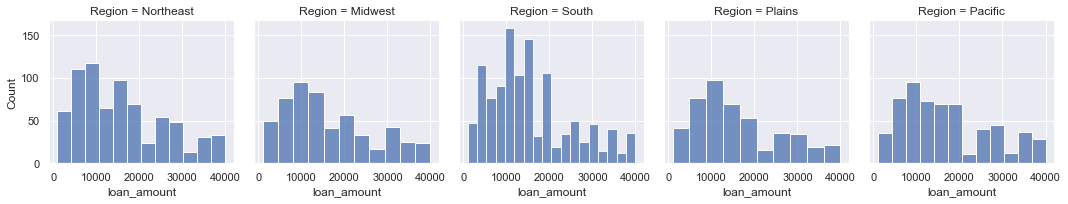

In [104]:
loans_region_df = df_region[['Region','loan_amount']]
g = sns.FacetGrid(loans_region_df,col='Region')
g.map(sns.histplot,'loan_amount')
plt.show()

Findings: South tends to have larger quantity of loans as opposed to other regions especially with loan amounts lower than 20K. 

# 7. Think of some questions you want to ask our guests next week. You can ask them anything, just make sure its thoughtful.

What are some of the data science methods that are being used a lot in life sciences industry?
Could you talk about one of the most exciting and unique data science projects you wokred on? How big was the team and what role did you play?

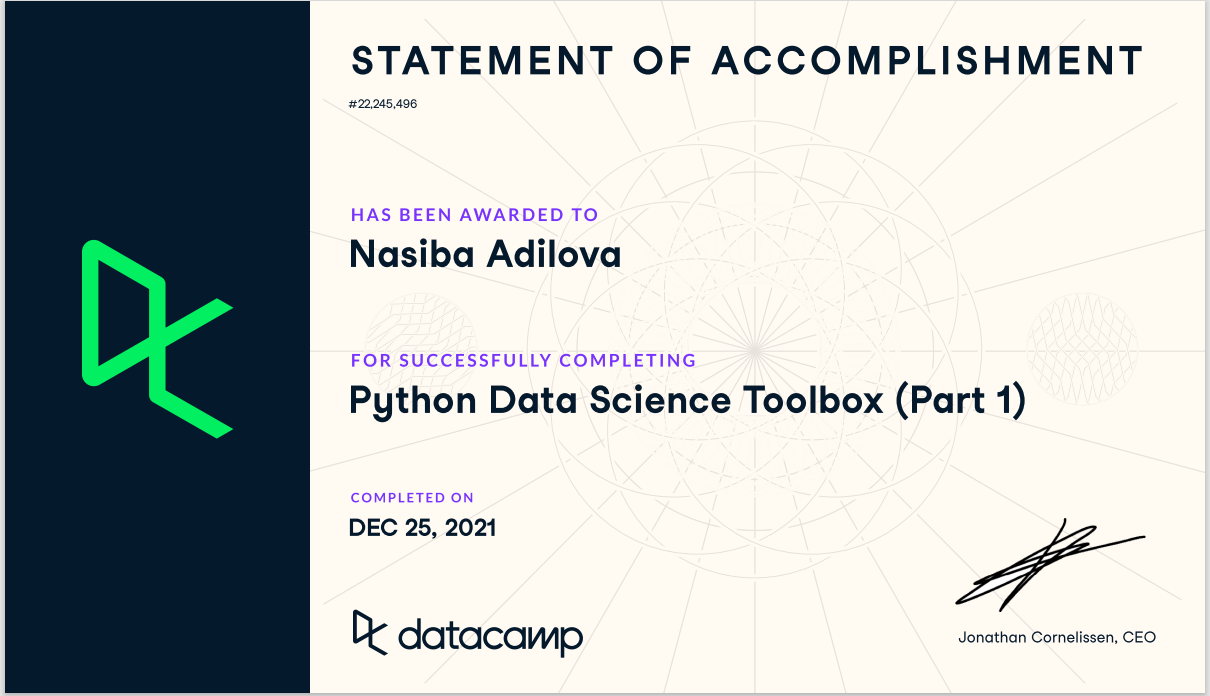

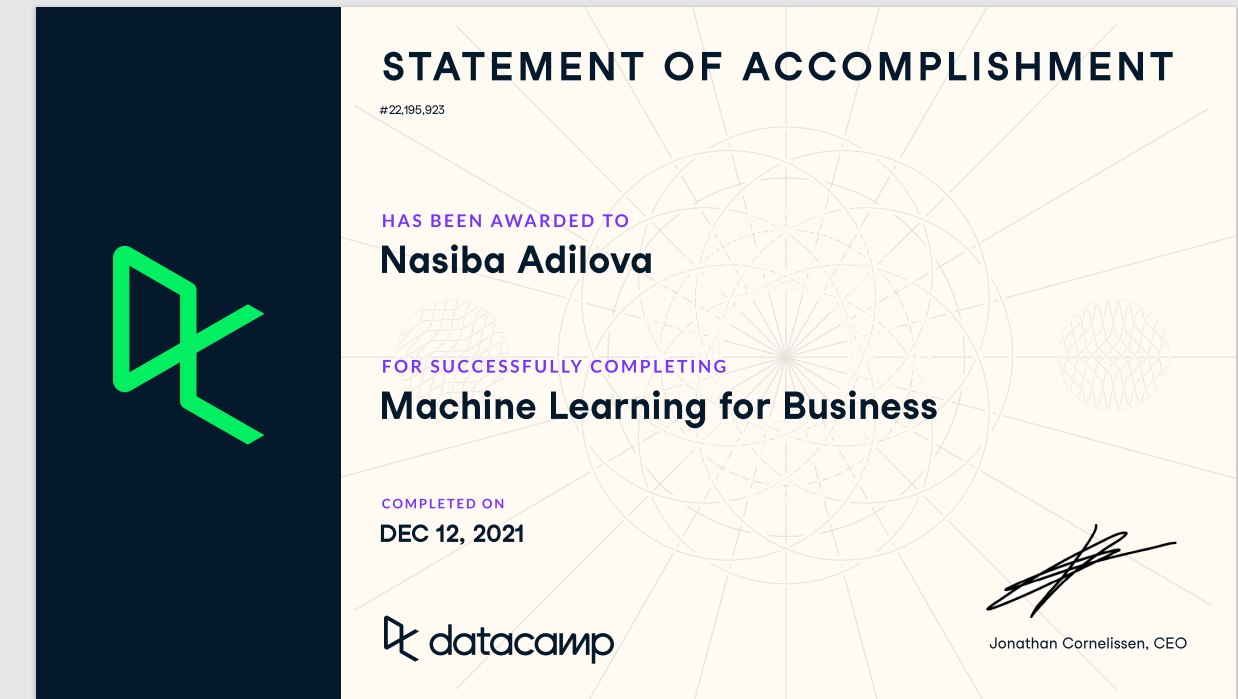